In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from myFunctions.cleaning import standardize_column_names

plt.rcParams['figure.dpi'] == 300
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("D:\College\Academics\Extra\Datasets\hvac.csv")
df = standardize_column_names(df)
df.head()

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),building_type,hvac_system,average_temperature_in_last_24_hours_(c),energy_consumption_(kwh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480


In [10]:
def plot_correlation_heatmap(df: pd.DataFrame, 
                             annot: bool = True, 
                             fmt: str = '.2f', 
                             cmap: str = 'RdBu_r',
                             line_width: float = .5,
                             square: bool = True,
                             annot_size: int = 12,
                             title: str = 'Correlation Heatmap'
) -> None:
    numerical_columns = df.describe().columns.to_list()
    correlation_matrix = df[numerical_columns].corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(correlation_matrix, mask=mask, annot=annot, fmt=fmt, cmap=cmap, center=0, linewidths=line_width, square=square, annot_kws={'size':annot_size})
    plt.title(title)
    plt.show()

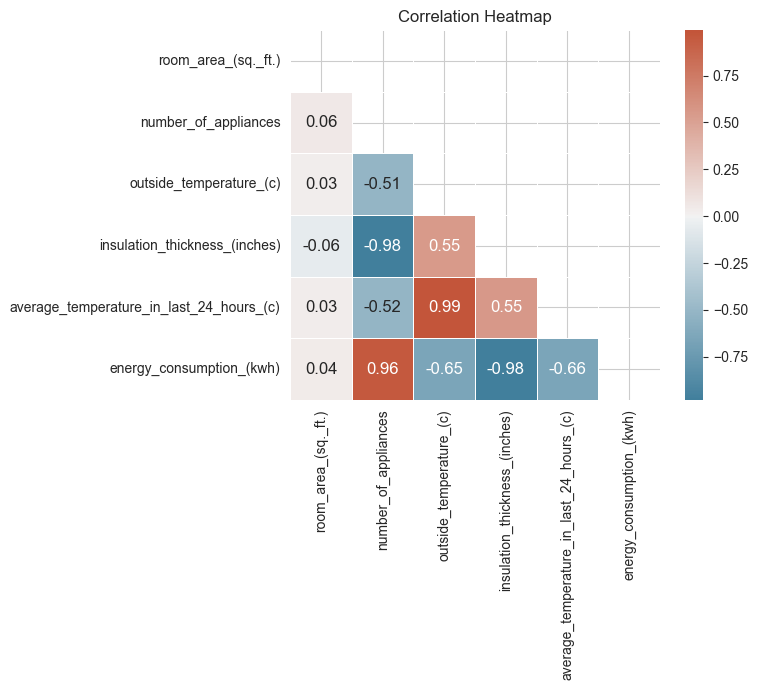

In [11]:
plot_correlation_heatmap(df)

In [12]:
def plot_scatter(df: pd.DataFrame,  # Input DataFrame containing the data for the scatter plot
                 x: str,  # String representing the x-axis column name
                 y: str,  # String representing the y-axis column name
                 hue: str = None,  # Optional string representing the categorical variable for coloring the plot (default is None)
                 style: str = None,  # Optional string representing the categorical variable for styling the plot (default is None)
                 size: int = None,  # Optional integer representing the size of the markers (default is None)
                 palette: str = 'Set1',  # String representing the color palette for the plot
                 alpha: float = 0.7  # Float representing the transparency of the markers (default is 0.7)
) -> None:  # This function plots a scatter plot of the specified x and y variables from the input DataFrame
    """
    This function plots a scatter plot of the specified x and y variables from the input DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data for the scatter plot.
    x (str): String representing the x-axis column name.
    y (str): String representing the y-axis column name.
    hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None.
    style (str, optional): Optional string representing the categorical variable for styling the plot. Default is None.
    size (int, optional): Optional integer representing the size of the markers. Default is None.
    palette (str, optional): String representing the color palette for the plot. Default is 'Set1'.
    alpha (float, optional): Float representing the transparency of the markers. Default is 0.7.

    Returns:
    None: This function does not return any value. It only plots the scatter plot.

    Example usage:
    >>> # Plot a scatter plot of 'number_of_appliances' vs 'room_area_(sq._ft.)'
    >>> plot_scatter(df, x='number_of_appliances', y='room_area')
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=style, size=size, palette=palette, alpha=alpha)
    plt.title(f'Scatter plot of {y} vs {x}')
    plt.show()

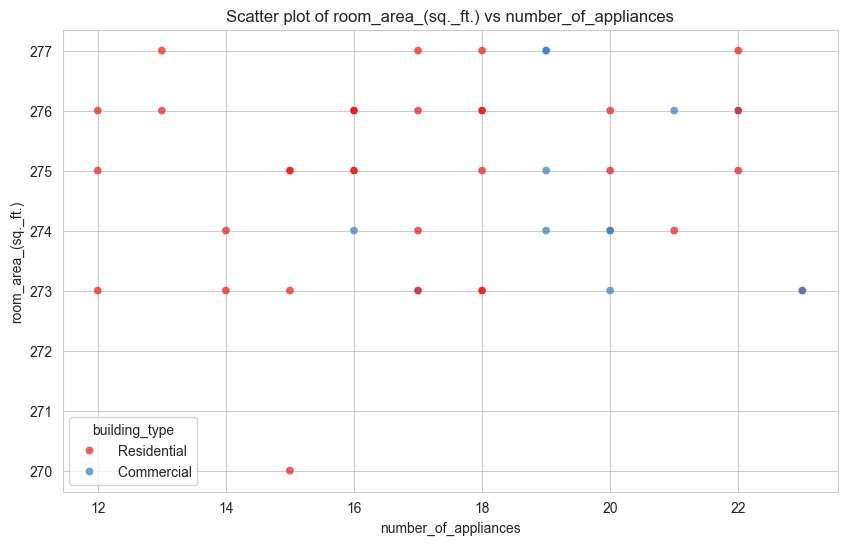

In [15]:
plot_scatter(df, x='number_of_appliances', y='room_area_(sq._ft.)', hue='building_type')

In [13]:
df

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),building_type,hvac_system,average_temperature_in_last_24_hours_(c),energy_consumption_(kwh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480
5,276,16,18,1.9,Residential,Window AC,16,400
6,274,14,15,2.2,Residential,Central AC,14,360
7,275,19,23,1.6,Commercial,Split AC,22,430
8,274,17,25,2.0,Residential,Window AC,26,390
9,273,23,10,1.1,Residential,Central AC,10,510


In [17]:
def plot_box(df: pd.DataFrame,  # Input DataFrame containing the data for the box plot
             x: str,  # String representing the x-axis column name
             y: str,  # String representing the y-axis column name
             hue: str = None,  # Optional string representing the categorical variable for coloring the plot (default is None)
             palette: str = 'Set1'  # String representing the color palette for the plot (default is 'Set1')
) -> None:  # This function plots a box plot of the specified x and y variables from the input DataFrame
    """
    This function plots a box plot of the specified x and y variables from the input DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data for the box plot.
    x (str): String representing the x-axis column name.
    y (str): String representing the y-axis column name.
    hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None.
    palette (str, optional): String representing the color palette for the plot. Default is 'Set1'.

    Returns:
    None: This function does not return any value. It only plots the box plot.

    Example usage:
    >>> # Plot a box plot of 'number_of_appliances' vs 'room_area'
    >>> plot_box(df, x='number_of_appliances', y='room_area')
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=x, y=y, hue=hue, palette=palette)
    plt.title(f'Box plot of {y} by {x}')
    plt.show()

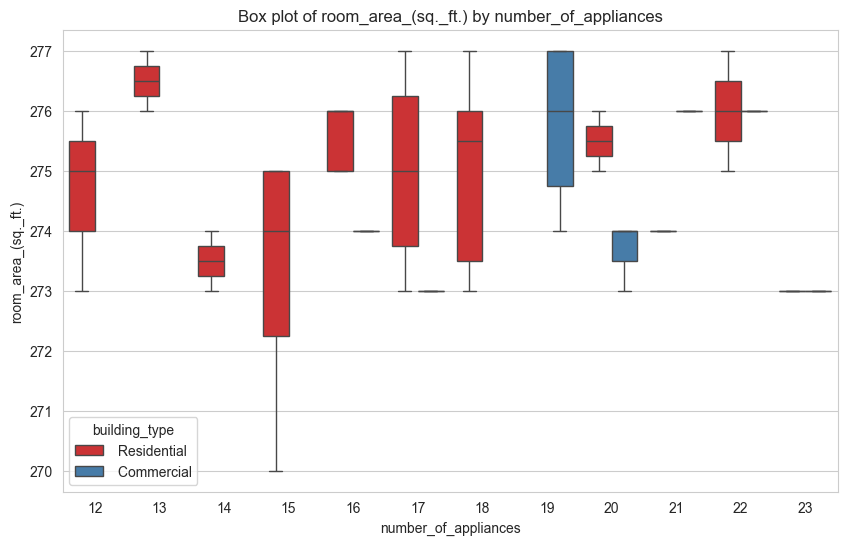

In [18]:
plot_box(df, x='number_of_appliances', y='room_area_(sq._ft.)', hue='building_type')

In [19]:
def plot_pair(df: pd.DataFrame,  # Input DataFrame containing the data for the pairplot
              hue: str = None,  # Optional string representing the categorical variable for coloring the plot (default is None)
              palette: str = 'Set1'  # String representing the color palette for the plot (default is 'Set1'
) -> None:  # This function plots a pairplot of the input DataFrame
    """
    This function plots a pairplot of the input DataFrame. A pairplot is a type of plot that displays the relationships between pairs of variables in a dataset.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data for the pairplot. This DataFrame should have numerical variables for the pairplot to be effective.
    hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None.
    palette (str, optional): String representing the color palette for the plot. Default is 'Set1'.

    Returns:
    None: This function does not return any value. It only plots the pairplot.

    Example usage:
    >>> # Plot a pairplot of the input DataFrame
    >>> plot_pair(df)
    """
    sns.pairplot(df, hue=hue, palette=palette)
    plt.show()

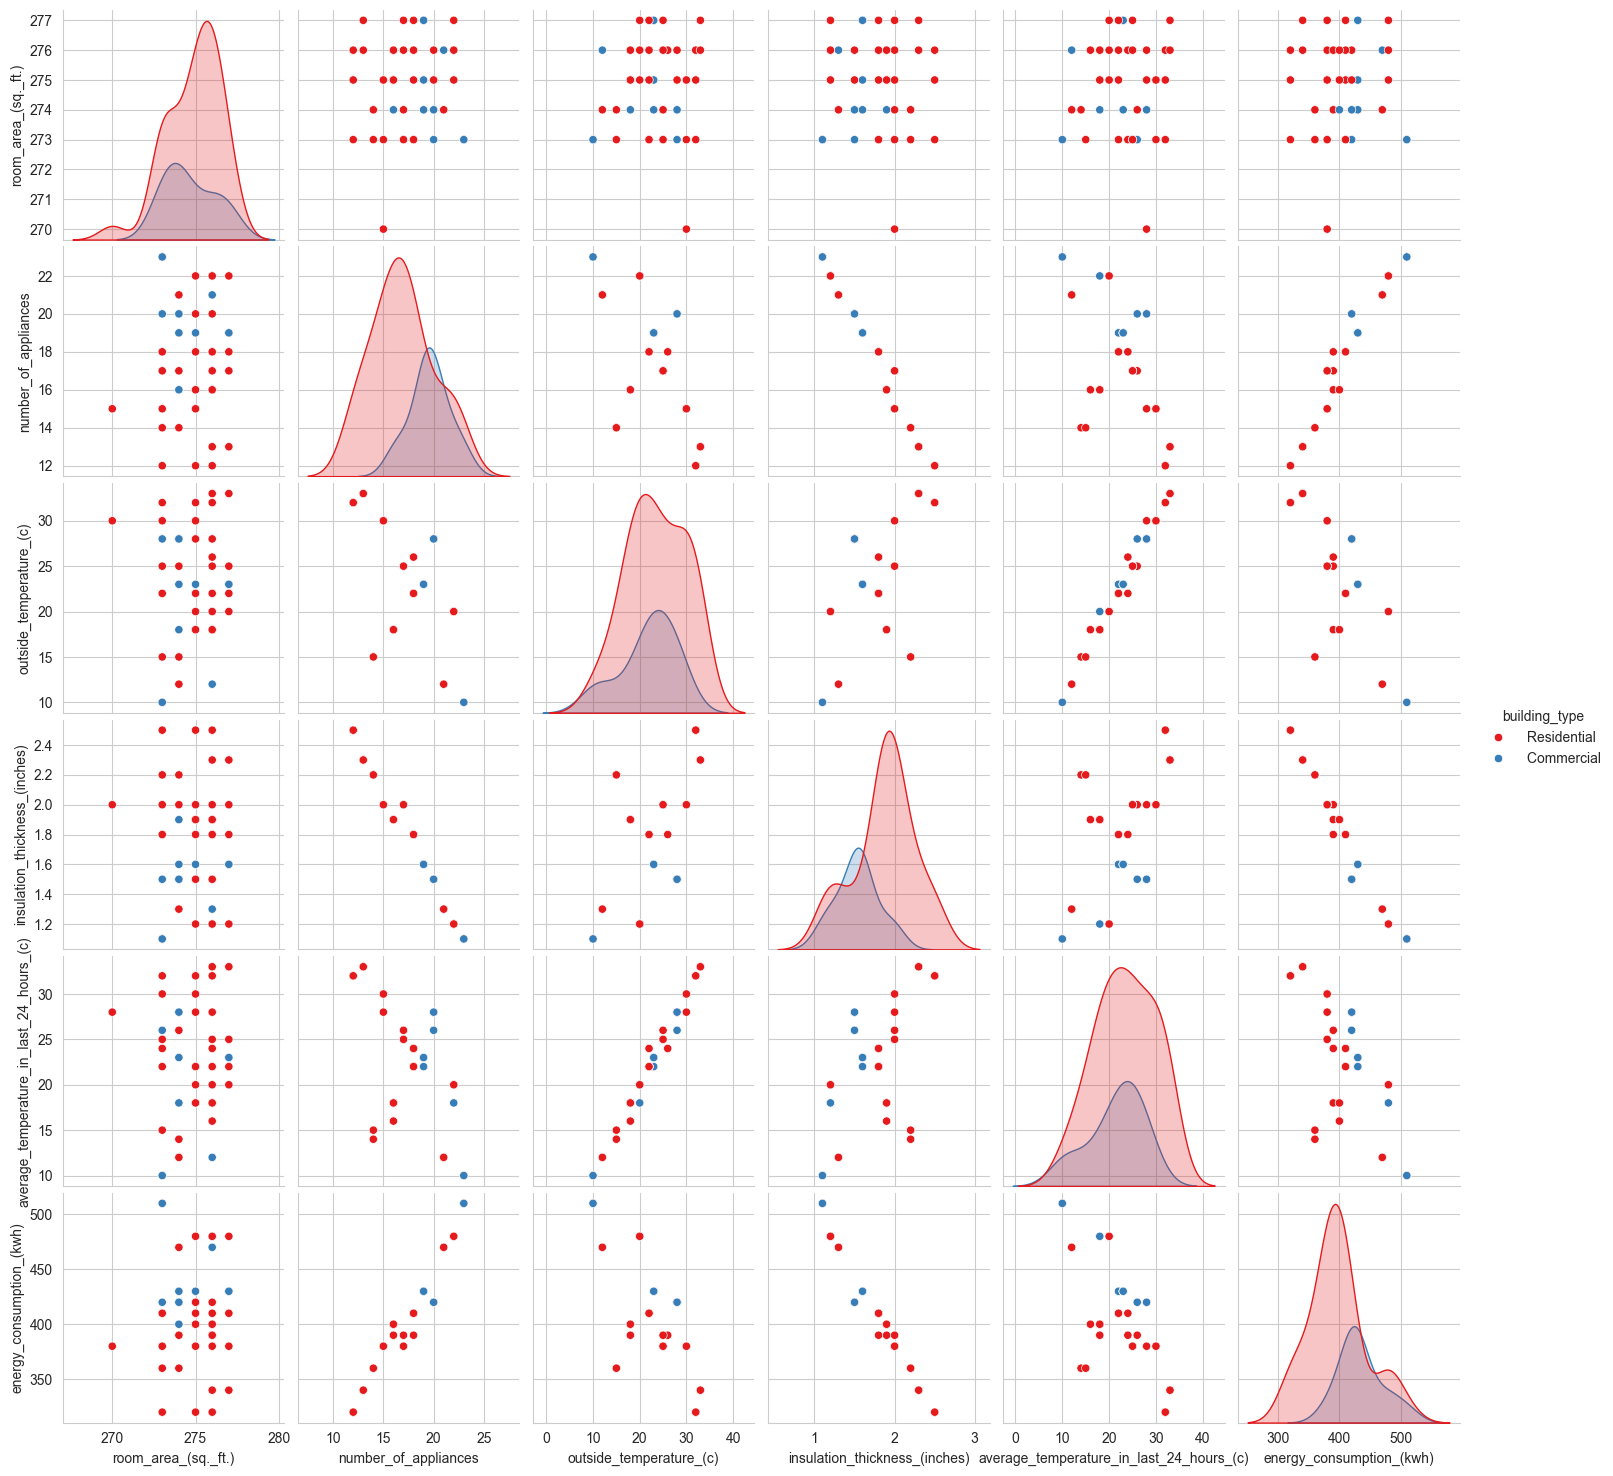

In [21]:
plot_pair(df=df, hue='building_type')

In [ ]:
def plot_feature_importance(importances, feature_names):
    """
    Plot feature importance for a model.

    Parameters:
    - importances: Array of feature importances
    - feature_names: List of feature names

    Returns:
    - None
    """
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [22]:
def plot_violin(df: pd.DataFrame, 
                x: str, 
                y: str, 
                hue: str = None, 
                split: bool = False, 
                palette: str = 'Set1'
) -> pd.DataFrame:
    """
    This function plots a violin plot of the specified x and y variables from the input DataFrame. A violin plot is a type of plot that displays the distribution of a variable and its underlying density.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the violin plot. This DataFrame should have numerical variables for the violin plot to be effective.
    - x (str): String representing the x-axis column name.
    - y (str): String representing the y-axis column name.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None.
    - split (bool, optional): Boolean representing whether to split the violin plot by the specified hue variable. Default is False.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'.

    Returns:
    - pd.DataFrame: The modified DataFrame with the violin plot added. This function does not return any other value.

    Example usage:
    >>> # Plot a violin plot of 'number_of_appliances' vs 'room_area'
    >>> plot_violin(df, x='number_of_appliances', y='room_area')
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x=x, y=y, hue=hue, split=split, palette=palette)
    plt.title(f'Violin plot of {y} by {x}')
    plt.show()

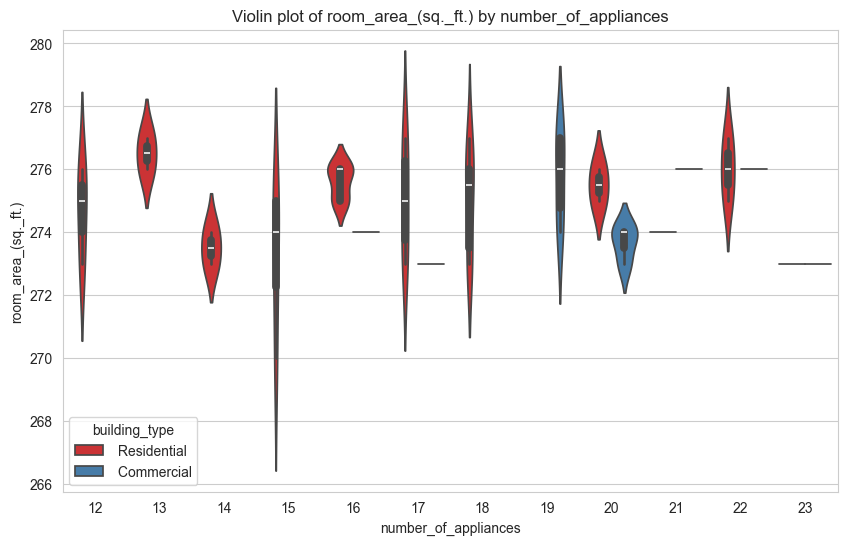

In [27]:
plot_violin(df, x='number_of_appliances', y='room_area_(sq._ft.)', hue='building_type', split=False)

In [28]:
def plot_line(df: pd.DataFrame,
              x: str, 
              y: str, 
              hue: str = None, 
              style: str = None, 
              markers: bool = False, 
              dashes: bool = True, 
              palette: str = 'Set1'
) -> None:
    """
    This function plots a line plot of the specified x and y variables from the input DataFrame. A line plot is a type of plot that displays the relationship between two variables over time or across different categories.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the line plot. This DataFrame should have numerical variables for the line plot to be effective.
    - x (str): String representing the x-axis column name.
    - y (str): String representing the y-axis column name.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None.
    - style (str, optional): Optional string representing the categorical variable for styling the plot. Default is None.
    - markers (bool, optional): Boolean representing whether to display markers at each data point. Default is False.
    - dashes (bool, optional): Boolean representing whether to display dashed lines between data points. Default is True.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'.

    Returns:
    - None: This function does not return any value. It only plots the line plot.

    Example usage:
    >>> # Plot a line plot of 'number_of_appliances' vs 'room_area'
    >>> plot_line(df, x='number_of_appliances', y='room_area')
    """
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, hue=hue, style=style, markers=markers, dashes=dashes, palette=palette)
    plt.title(f'Line plot of {y} over {x}')
    plt.show()

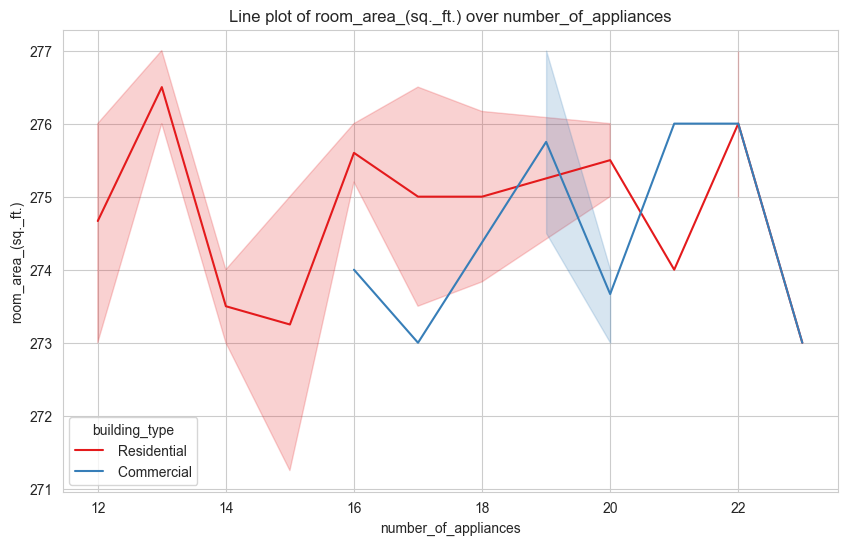

In [30]:
plot_line(df, x='number_of_appliances', y='room_area_(sq._ft.)', hue='building_type')

In [40]:
def plot_histogram_with_stats(df: pd.DataFrame, 
                              columns: list[str] = None,
                              scale: str = 'linear'
) -> None:
    """
    This function plots a histogram with mean and median lines for the specified data series in the input DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data series for which to generate the histogram. This DataFrame should have numerical variables for the histogram to be effective.
    - columns (list[str], optional): List of column names in the input DataFrame for which to generate the histogram. If not provided, all numerical columns will be used. Default is None.
    - scale (str, optional): String representing the scale for the y-axis of the histogram. Default is 'linear'.

    Returns:
    - None: This function does not return any value. It only plots the histogram with mean and median lines.

    Example usage:
    >>> # Plot a histogram with mean and median lines for the 'number_of_appliances' column
    >>> plot_histogram_with_stats(df, columns=['number_of_appliances'])
    """
    if columns is None:
        columns = df.describe().columns.to_list()
    
    for column in columns:
        sns.histplot(df[column])
        plt.axvline(df[column].mean(), color='r', linestyle='--')
        plt.axvline(df[column].median(), color='g', linestyle='-')
        
        plt.legend({'Mean': df[column].mean(), 'Median': df[column].median()})
        plt.title(f'Histogram of {column}')
        plt.yscale(scale)
        plt.show()

In [41]:
numerical_columns = df.describe().columns.to_list()

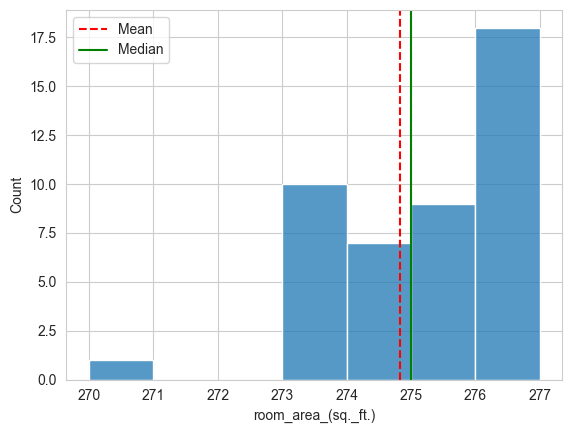

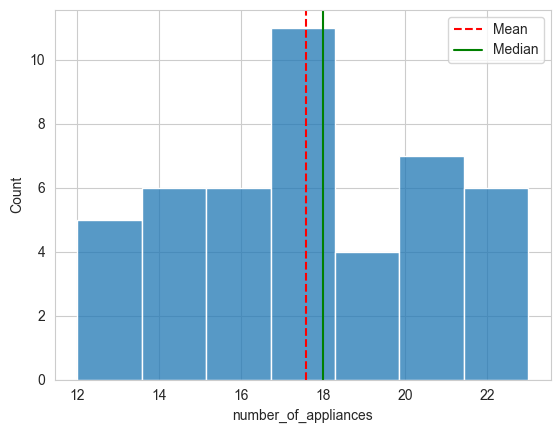

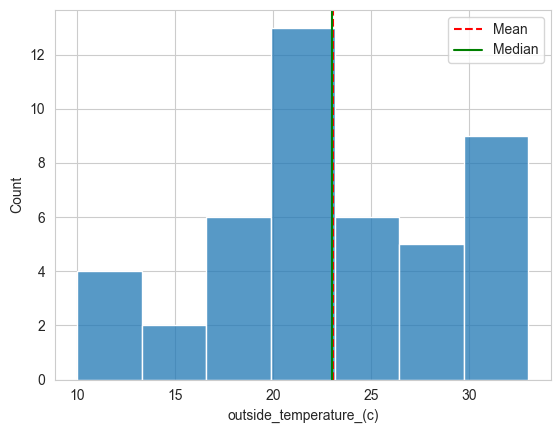

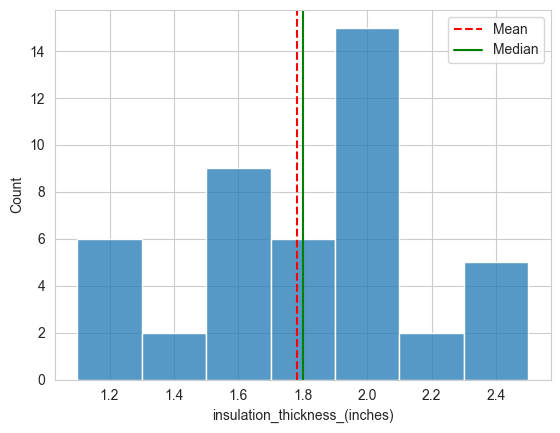

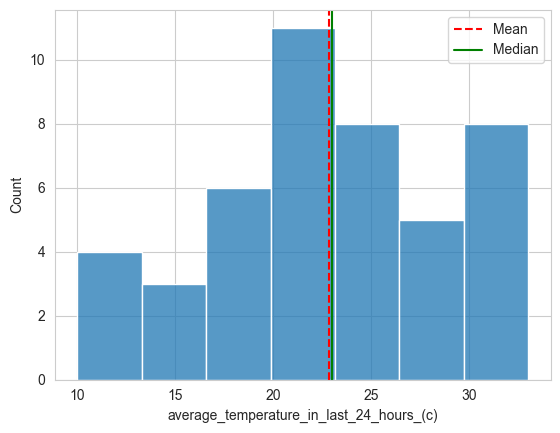

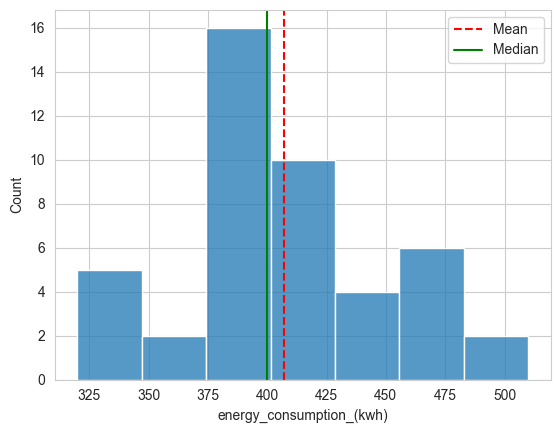

In [43]:
plot_histogram_with_stats(df)

In [44]:
def plot_bar(df: pd.DataFrame, 
             x: str, 
             y: str, 
             hue: str = None, 
             palette: str = 'Set1'
) -> None:
    """
    This function plots a bar plot of the specified x and y variables from the input DataFrame. A bar plot is a type of plot that displays the frequency or count of data points in different categories.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the bar plot. This DataFrame should have numerical variables for the bar plot to be effective.
    - x (str): String representing the x-axis column name. This column will be used as the categories for the bar plot.
    - y (str): String representing the y-axis column name. This column will be used as the values for the bar plot.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None. If provided, the bar plot will be colored based on the values in this column.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'. This parameter specifies the colors that will be used for the bars in the plot.

    Returns:
    - None: This function does not return any value. It only plots the bar plot.

    Example usage:
    >>> # Plot a bar plot of 'number_of_appliances' vs 'room_area'
    >>> plot_bar(df, x='number_of_appliances', y='room_area')
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=x, y=y, hue=hue, palette=palette)
    plt.title(f'Bar plot of {y} by {x}')
    plt.show()

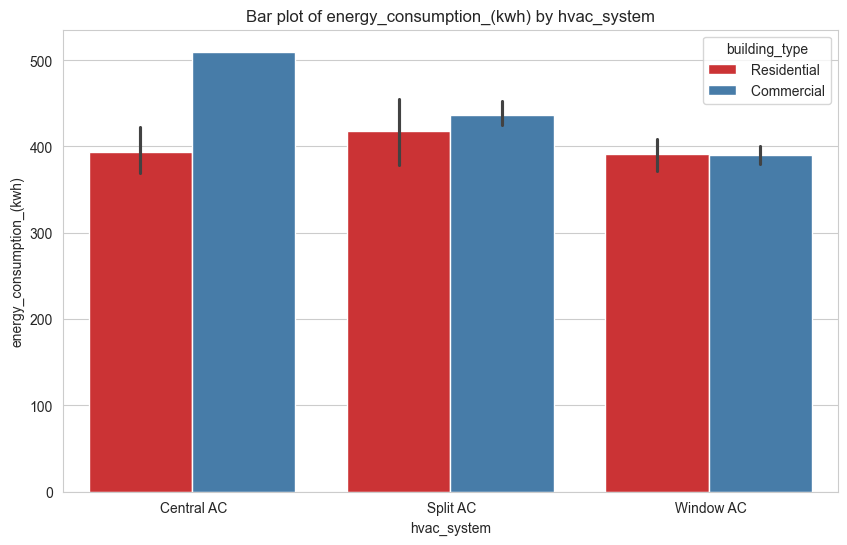

In [47]:
plot_bar(df, y="energy_consumption_(kwh)", x='hvac_system', hue='building_type')

In [50]:
def plot_heatmap(df: pd.DataFrame,
                 annot: bool = True,
                 fmt: str = '.2f',
                 cmap: str = 'coolwarm',
                 columns: list[str] = None,
                 title: str = 'Heatmap'
) -> None:
    """
    This function plots a heatmap with annotations for the specified data series in the input DataFrame. A heatmap is a type of plot that displays the correlation between pairs of variables in a dataset.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data series for which to generate the heatmap. This DataFrame should have numerical variables for the heatmap to be effective.
    - annot (bool, optional): Boolean representing whether to display annotations on the heatmap. Default is True.
    - fmt (str, optional): String representing the format for the values displayed on the heatmap. Default is '.2f'.
    - cmap (str, optional): String representing the color map for the heatmap. Default is 'coolwarm'.
    - columns (list[str], optional): List of column names in the input DataFrame for which to generate the heatmap. If not provided, all numerical columns will be used. Default is None.
    - title (str, optional): String representing the title for the heatmap. Default is 'Heatmap'.

    Returns:
    - None: This function does not return any value. It only plots the heatmap with annotations.

    Example usage:
    >>> # Plot a heatmap with annotations for the 'number_of_appliances' and 'room_area' columns
    >>> plot_heatmap(df, annot=True, columns=['number_of_appliances', 'room_area'])
    """
    if columns is None:
        columns = df.describe().columns.to_list()
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[columns], annot=annot, fmt=fmt, cmap=cmap)
    plt.title(title)
    plt.show()

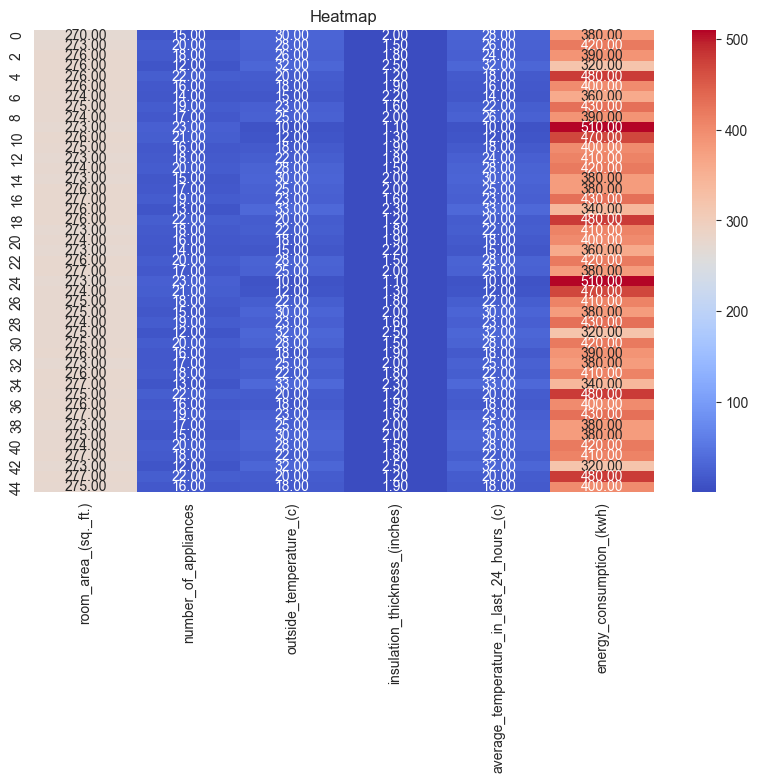

In [51]:
plot_heatmap(df)

In [52]:
def plot_count(df: pd.DataFrame, 
               x: str, 
               hue: str = None, 
               palette: str = 'Set1'
) -> None:
    """
    This function plots a count plot of the specified x variable from the input DataFrame. A count plot is a type of plot that displays the frequency or count of data points in different categories.
   
    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the count plot. This DataFrame should have numerical variables for the count plot to be effective.
    - x (str): String representing the x-axis column name. This column will be used as the categories for the count plot.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None. If provided, the count plot will be colored based on the values in this column.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'. This parameter specifies the colors that will be used for the bars in the plot.
    
    Returns:
    - None: This function does not return any value. It only plots the count plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x, hue=hue, palette=palette)
    plt.title(f'Count plot of {x}')
    plt.show()

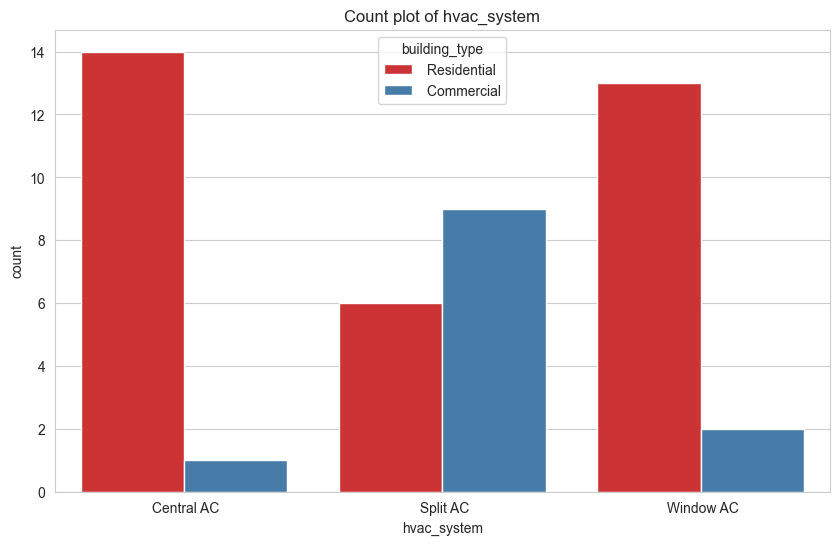

In [55]:
plot_count(df, 'hvac_system', hue='building_type')

In [ ]:
def plot_regression(df: pd.DataFrame, 
                    x: str, 
                    y: str, 
                    hue: str = None, 
                    palette: str = 'Set1',
                    scatter_size: float = 10
) -> None:
    """
    This function plots a regression plot of the specified x and y variables from the input DataFrame. A regression plot is a type of plot that displays the relationship between two variables over time or across different categories.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the regression plot. This DataFrame should have numerical variables for the regression plot to be effective.
    - x (str): String representing the x-axis column name. This column will be used as the independent variable in the regression plot.
    - y (str): String representing the y-axis column name. This column will be used as the dependent variable in the regression plot.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None. If provided, the regression plot will be colored based on the values in this column.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'. This parameter specifies the colors that will be used for the regression line in the plot.
    - scatter_size (float, optional): Float representing the size of the markers in the scatter plot. Default is 10.
    
    Returns:
    - None: This function does not return any value. It only plots the regression plot.
    
    Example usage:
    >>> # Plot a regression plot of 'energy_consumption_(kwh)' vs 'number_of_appliances'
    >>> plot_regression(df, 'energy_consumption_(kwh)', 'number_of_appliances'
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=x, y=y, color='blue', scatter_kws={'s': scatter_size})
    if hue:
        sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=palette, legend=False)
    plt.title(f'Regression plot of {y} vs {x}')
    plt.show()

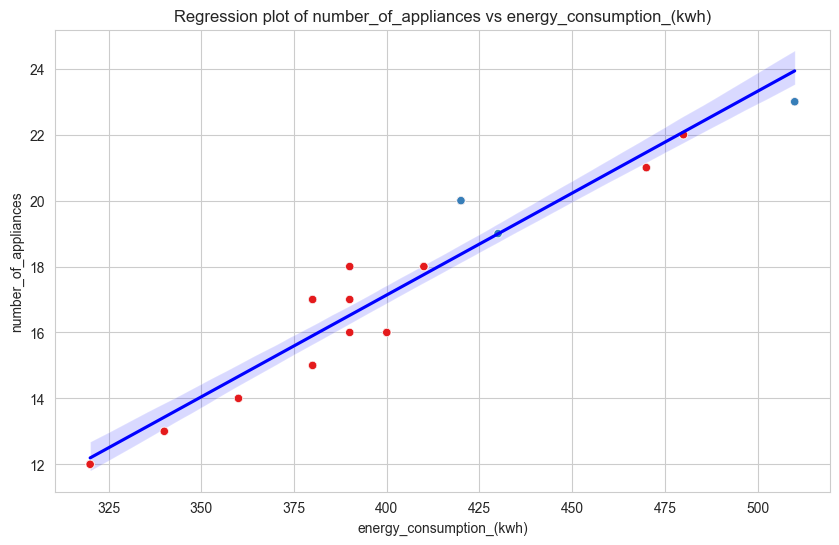

In [59]:
plot_regression(df, 'energy_consumption_(kwh)', 'number_of_appliances', hue='building_type')

In [60]:
def plot_line_with_error(df: pd.DataFrame, 
                         x: str, 
                         y: str, 
                         yerr: str, 
                         hue: str = None, 
                         palette: str = 'Set1'
) -> None:
    """
    This function plots a line plot with error bars of the specified x and y variables from the input DataFrame. A line plot with error bars is a type of plot that displays the relationship between two variables over time or across different categories, along with the error bars representing the uncertainty in the data.
   
    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the line plot with error bars. This DataFrame should have numerical variables for the line plot to be effective.
    - x (str): String representing the x-axis column name. This column will be used as the independent variable in the line plot with error bars.
    - y (str): String representing the y-axis column name. This column will be used as the dependent variable in the line plot with error bars.
    - yerr (str): String representing the column name for the error bars. This column will be used to calculate the error bars for the line plot with error bars.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. Default is None. If provided, the line plot with error bars will be colored based on the values in this column.
    - palette (str, optional): String representing the color palette for the plot. Default is 'Set1'. This parameter specifies the colors that will be used for the line plot with error bars.

    Returns:
    - None: This function does not return any value. It only plots the line plot with error bars.
    """
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, hue=hue, palette=palette, ci=None)
    plt.errorbar(df[x], df[y], yerr=df[yerr], fmt='o', color='red')
    plt.title(f'Line plot of {y} with error bars')
    plt.show()

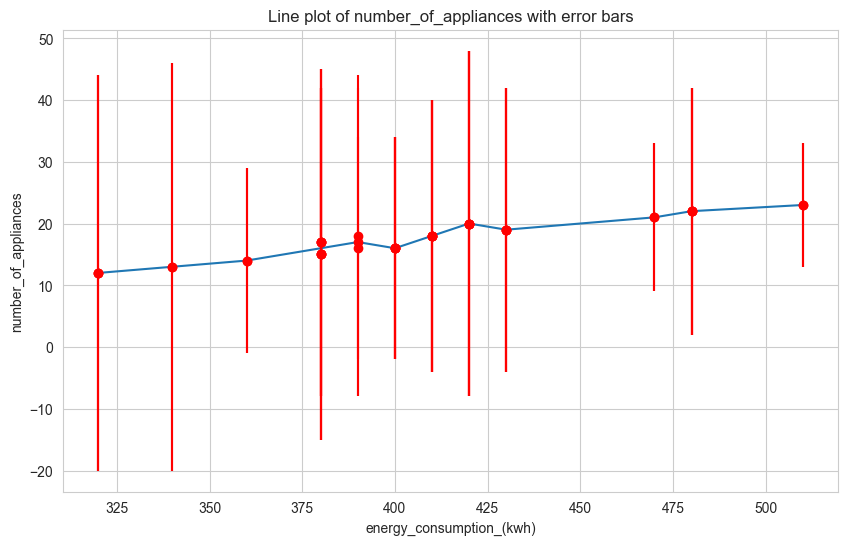

In [63]:
plot_line_with_error(df, x='energy_consumption_(kwh)', y='number_of_appliances', yerr='outside_temperature_(c)')

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as mcolors

def plot_3d_scatter(df: pd.DataFrame, x: str, y: str, z: str, hue: str = None) -> None:
    """
    This function plots a 3D scatter plot of the specified x, y, and z variables from the input DataFrame. If the 'hue' parameter is provided, the scatter plot will be colored based on the values in the specified column.
   
    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data for the 3D scatter plot.
    - x (str): String representing the x-axis column name.
    - y (str): String representing the y-axis column name.
    - z (str): String representing the z-axis column name.
    - hue (str, optional): Optional string representing the categorical variable for coloring the plot. If provided, the scatter plot will be colored based on the values in the specified column.

    Returns:
    - None: This function does not return any value. It only plots the 3D scatter plot.
    """
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    if hue:
        le = LabelEncoder()
        hue_encoded = le.fit_transform(df[hue])
        cmap = plt.get_cmap('viridis', len(le.classes_))
        scatter = ax.scatter(df[x], df[y], df[z], c=hue_encoded, cmap=cmap)
        cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
        cbar.set_ticks(range(len(le.classes_)))
        cbar.set_ticklabels(le.classes_)
        cbar.set_label(hue)
    else:
        scatter = ax.scatter(df[x], df[y], df[z])

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    plt.title(f'3D scatter plot of {x}, {y}, and {z}')
    plt.show()

In [74]:
df.columns

Index(['room_area_(sq._ft.)', 'number_of_appliances',
       'outside_temperature_(c)', 'insulation_thickness_(inches)',
       'building_type', 'hvac_system',
       'average_temperature_in_last_24_hours_(c)', 'energy_consumption_(kwh)'],
      dtype='object')

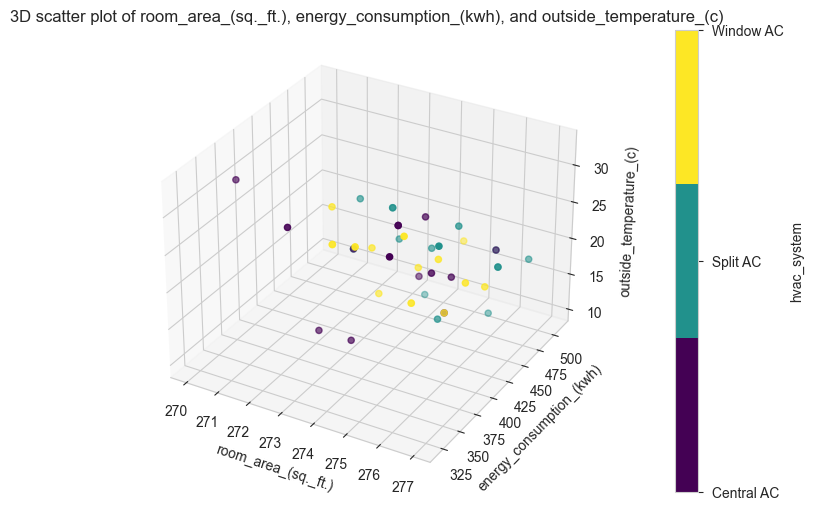

In [77]:
plot_3d_scatter(df, x='room_area_(sq._ft.)', y='energy_consumption_(kwh)', z='outside_temperature_(c)', hue='hvac_system')

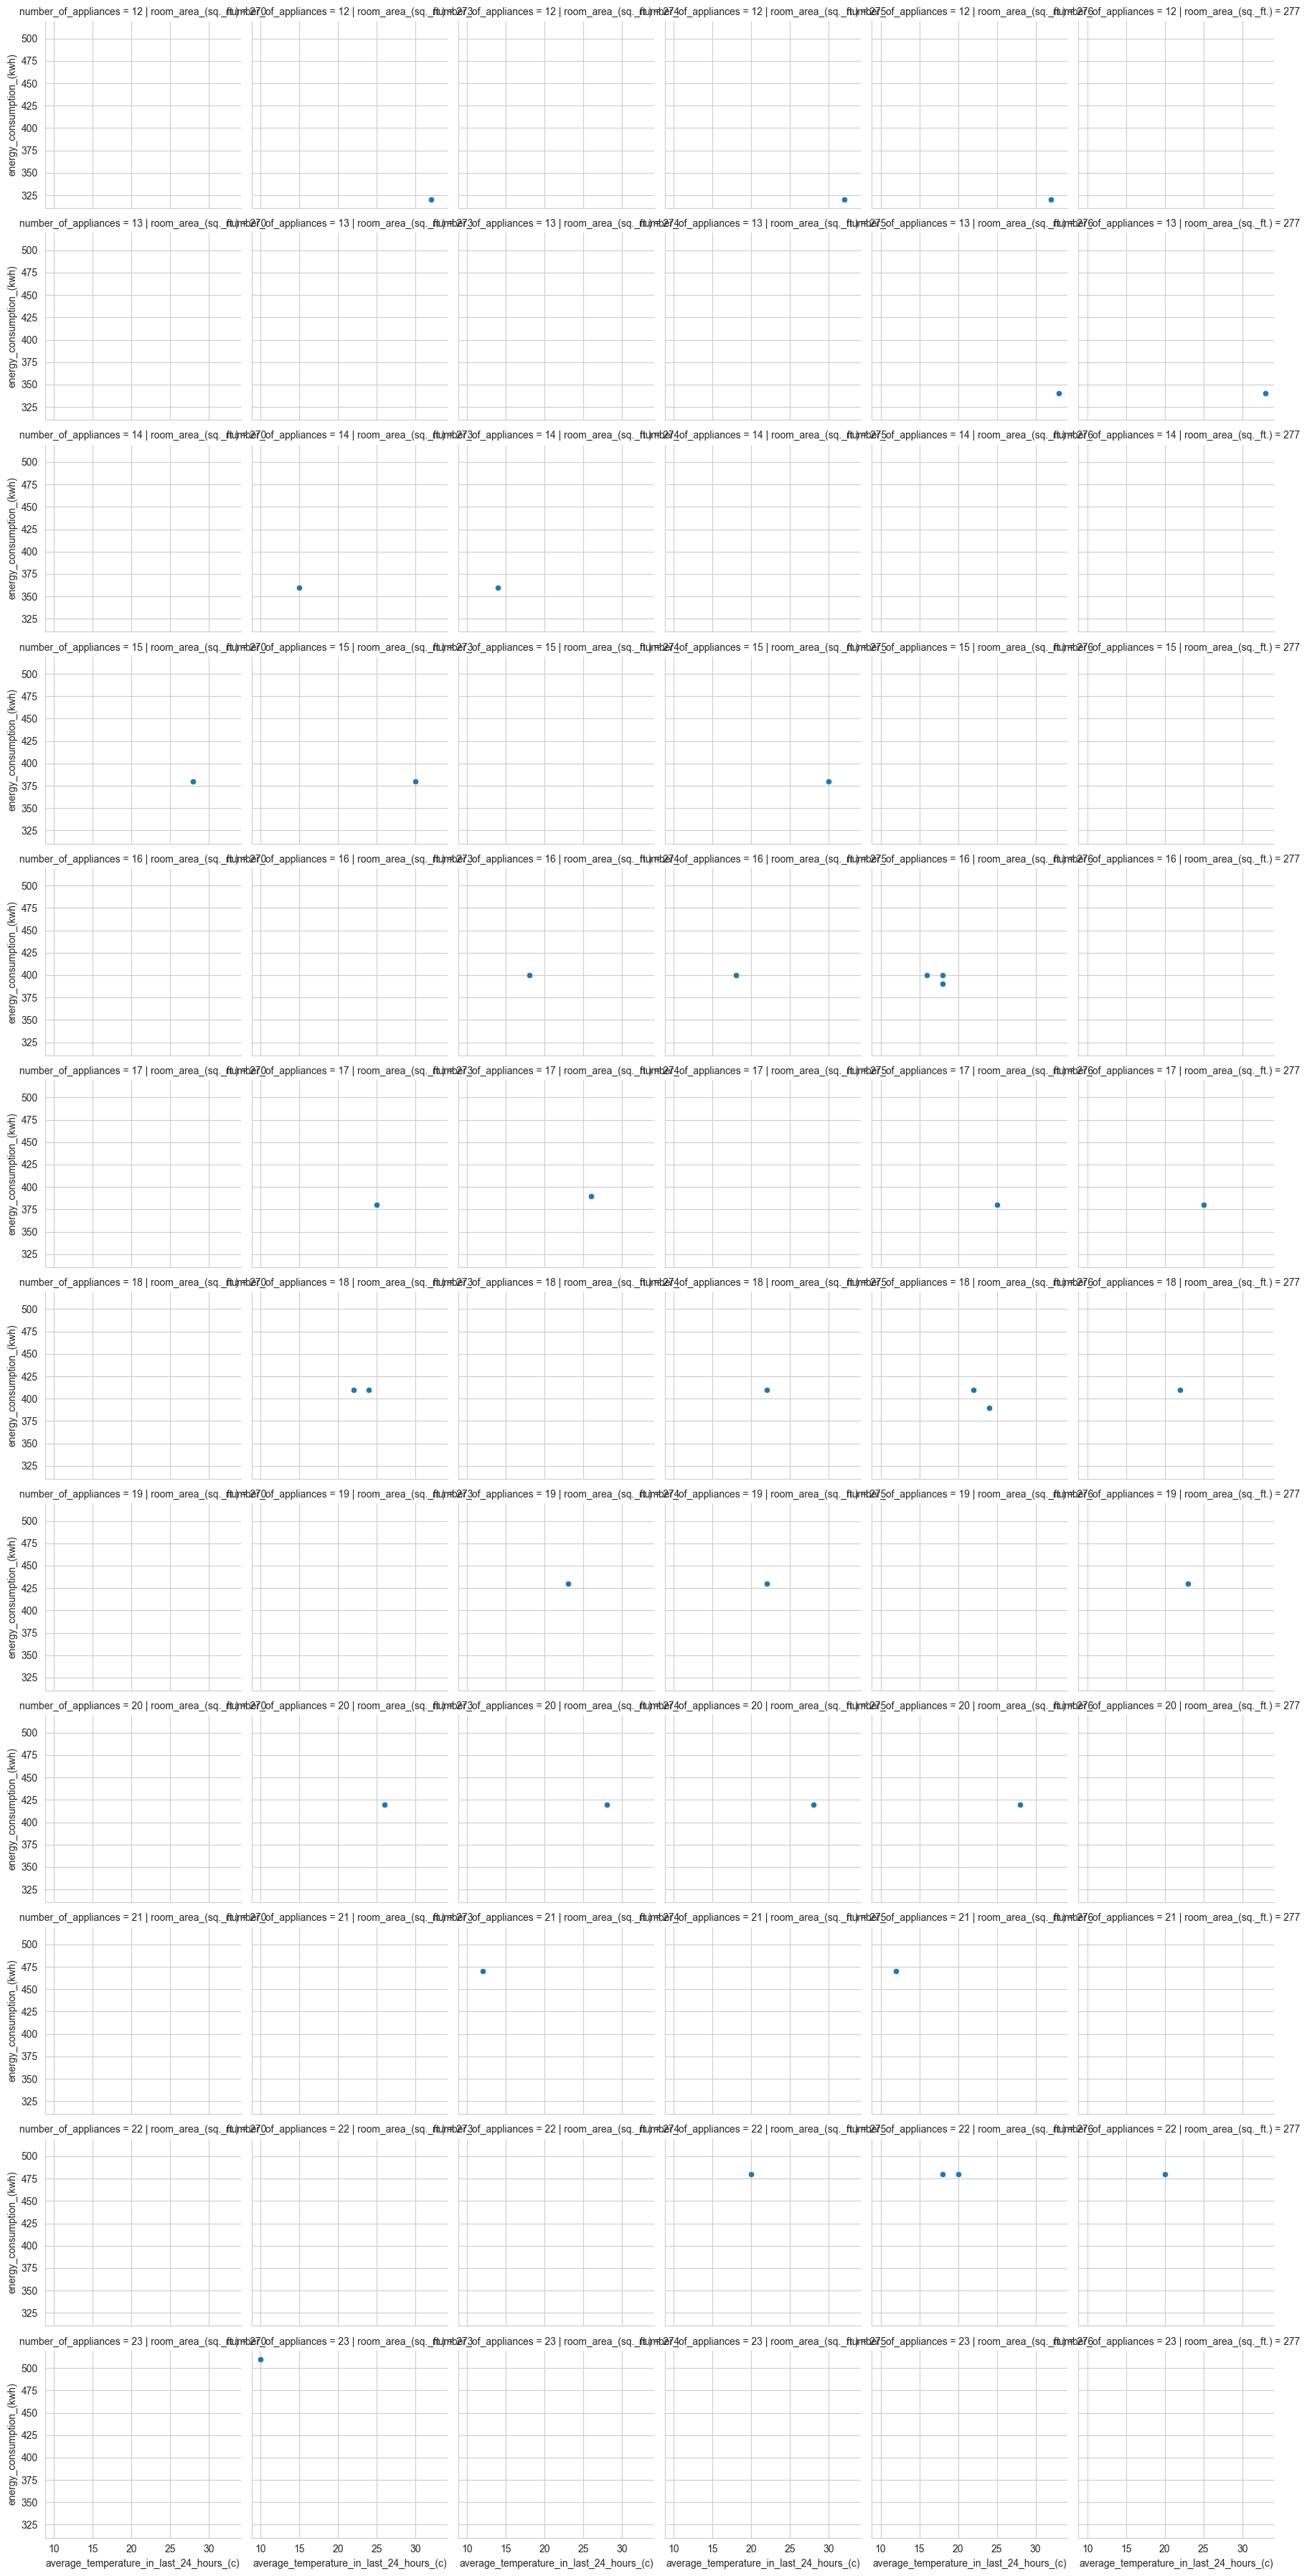

In [88]:
def plot_facet_grid(df: pd.DataFrame, col: str, row: str, x: str, y: str, hue: str = None, palette: str = 'Set1') -> None:
    """
    Creates a FacetGrid plot with scatter plots for each facet.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col (str): The column name to create facets along the columns.
    row (str): The column name to create facets along the rows.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    hue (str, optional): The column name for color encoding. Default is None.
    palette (str, optional): The color palette for the hue variable. Default is 'Set1'.
    
    Usage:
    plot_facet_grid(df, col='species', row='island', x='bill_length_mm', y='bill_depth_mm', hue='sex')
    """
    # Create the FacetGrid object
    g = sns.FacetGrid(df, col=col, row=row, hue=hue, palette=palette)
    
    # Map the scatterplot function to the FacetGrid
    g.map(sns.scatterplot, x, y)
    
    # Add a legend to the plot
    g.add_legend()
    
    # Display the plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'df' with columns 'room_area_(sq._ft.)', 'number_of_appliances', 'building_type', 'average_temperature_in_last_24_hours_(c)', and 'energy_consumption_(kwh)':
plot_facet_grid(df, col='room_area_(sq._ft.)', row='number_of_appliances', x='average_temperature_in_last_24_hours_(c)', y='energy_consumption_(kwh)')


In [97]:
import plotly.express as px

def plot_interactive_scatter(df: pd.DataFrame, x: str, y: str, color: str = None, size: str = None) -> None:
    fig = px.scatter(df, x=x, y=y, color=color, size=size)
    fig.show()

In [98]:
df.columns

Index(['room_area_(sq._ft.)', 'number_of_appliances',
       'outside_temperature_(c)', 'insulation_thickness_(inches)',
       'building_type', 'hvac_system',
       'average_temperature_in_last_24_hours_(c)', 'energy_consumption_(kwh)'],
      dtype='object')

In [99]:
plot_interactive_scatter(df, x='energy_consumption_(kwh)', y='energy_consumption_(kwh)')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [3]:
from myFunctions.cleaning import encode_categorical

In [4]:
encode_categorical(df)

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),average_temperature_in_last_24_hours_(c),energy_consumption_(kwh),building_type_ Residential,hvac_system_ Split AC,hvac_system_ Window AC
0,270,15,30,2.0,28,380,True,False,False
1,273,20,28,1.5,26,420,False,True,False
2,276,18,26,1.8,24,390,True,False,True
3,276,12,32,2.5,32,320,True,False,False
4,276,22,20,1.2,18,480,False,True,False
5,276,16,18,1.9,16,400,True,False,True
6,274,14,15,2.2,14,360,True,False,False
7,275,19,23,1.6,22,430,False,True,False
8,274,17,25,2.0,26,390,True,False,True
9,273,23,10,1.1,10,510,True,False,False


In [11]:
from myFunctions.cleaning import scale_data

In [14]:
scale_data(df, columns=['room_area_(sq._ft.)'], scaler='standard')

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),building_type,hvac_system,average_temperature_in_last_24_hours_(c),energy_consumption_(kwh)
0,-3.133431,15,30,2.0,Residential,Central AC,28,380
1,-1.184062,20,28,1.5,Commercial,Split AC,26,420
2,0.765308,18,26,1.8,Residential,Window AC,24,390
3,0.765308,12,32,2.5,Residential,Central AC,32,320
4,0.765308,22,20,1.2,Commercial,Split AC,18,480
5,0.765308,16,18,1.9,Residential,Window AC,16,400
6,-0.534272,14,15,2.2,Residential,Central AC,14,360
7,0.115518,19,23,1.6,Commercial,Split AC,22,430
8,-0.534272,17,25,2.0,Residential,Window AC,26,390
9,-1.184062,23,10,1.1,Residential,Central AC,10,510


In [4]:
from myFunctions.cleaning import handle_outliers

In [5]:
df.describe()

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),average_temperature_in_last_24_hours_(c),energy_consumption_(kwh)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,274.822222,17.577778,23.044444,1.782222,22.844444,407.111111
std,1.556349,3.026316,6.201010,0.376158,6.226613,46.837350
min,270.000000,12.000000,10.000000,1.100000,10.000000,320.000000
25%,274.000000,16.000000,18.000000,1.500000,18.000000,380.000000
50%,275.000000,18.000000,23.000000,1.800000,23.000000,400.000000
75%,276.000000,20.000000,28.000000,2.000000,28.000000,430.000000
max,277.000000,23.000000,33.000000,2.500000,33.000000,510.000000


In [6]:
handle_outliers(df, columns=['energy_consumption_(kwh)']).describe()

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),average_temperature_in_last_24_hours_(c),energy_consumption_(kwh)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,274.822222,17.577778,23.044444,1.782222,22.844444,407.111111
std,1.556349,3.026316,6.201010,0.376158,6.226613,46.837350
min,270.000000,12.000000,10.000000,1.100000,10.000000,320.000000
25%,274.000000,16.000000,18.000000,1.500000,18.000000,380.000000
50%,275.000000,18.000000,23.000000,1.800000,23.000000,400.000000
75%,276.000000,20.000000,28.000000,2.000000,28.000000,430.000000
max,277.000000,23.000000,33.000000,2.500000,33.000000,510.000000


In [6]:
from myFunctions.model import check_imbalance

In [7]:
check_imbalance(df, class_column='building_type')

,Class,Count,Ratio,Percentage
0,Residential,33,0.733333,73.333333
1,Commercial,12,0.266667,26.666667


In [8]:
from myFunctions.model import train_model

In [10]:
lis = [1,2,3,4,5,]
if 5 in lis:
    lis.remove(5)

In [11]:
lis

[1, 2, 3, 4]

In [12]:
df.select_dtypes('object')

,building_type,hvac_system
0,Residential,Central AC
1,Commercial,Split AC
2,Residential,Window AC
3,Residential,Central AC
4,Commercial,Split AC
5,Residential,Window AC
6,Residential,Central AC
7,Commercial,Split AC
8,Residential,Window AC
9,Residential,Central AC


In [3]:
from myFunctions.cleaning import encode_categorical
df = encode_categorical(df)

In [7]:
from sklearn.linear_model import LinearRegression
from myFunctions.model import train_model
model = LinearRegression()
model, X_train, X_test, y_train, y_test, performance_metrics = train_model(
                            data=df, target_column='energy_consumption_(kwh)', model=model, random_state=0)

In [11]:
performance_metrics

,Metric,Score,Inference
0,Mean Absolute Error,5.717191,Bad
1,Mean Squared Error,67.428883,Bad
2,R-squared,0.948082,Good


In [9]:
X_train

,room_area_(sq._ft.),number_of_appliances,outside_temperature_(c),insulation_thickness_(inches),average_temperature_in_last_24_hours_(c),building_type_ Residential,hvac_system_ Split AC,hvac_system_ Window AC
31,276,16,18,1.9,18,True,True,False
29,275,12,32,2.5,32,True,False,True
20,274,16,18,1.9,18,False,False,True
41,277,18,22,1.8,22,True,False,True
2,276,18,26,1.8,24,True,False,True
43,277,22,20,1.2,20,True,True,False
18,276,22,20,1.2,20,True,False,False
15,276,17,25,2.0,25,True,False,False
22,276,20,28,1.5,28,True,True,False
16,277,19,23,1.6,23,False,True,False


In [10]:
y_train

31    390
29    320
20    400
41    410
2     390
43    480
18    480
15    380
22    420
16    430
40    420
8     390
13    420
5     400
17    340
32    380
14    380
35    480
7     430
34    340
1     420
26    410
12    410
33    410
24    510
6     360
23    380
36    400
21    360
19    410
9     510
39    380
42    320
3     320
0     380
44    400
Name: energy_consumption_(kwh), dtype: int64

In [8]:
from myFunctions.model import detect_distribution
from myFunctions.viz import plot_histogram_with_stats

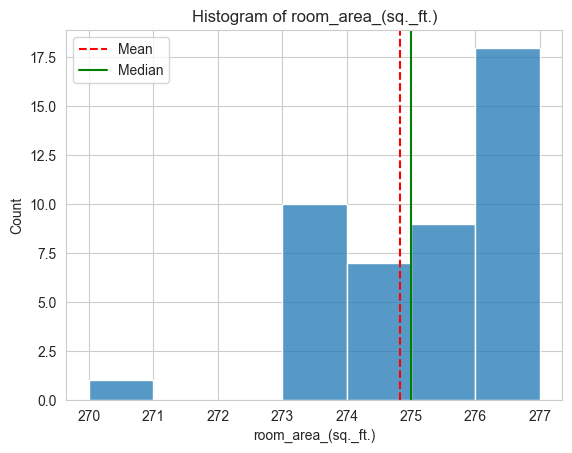

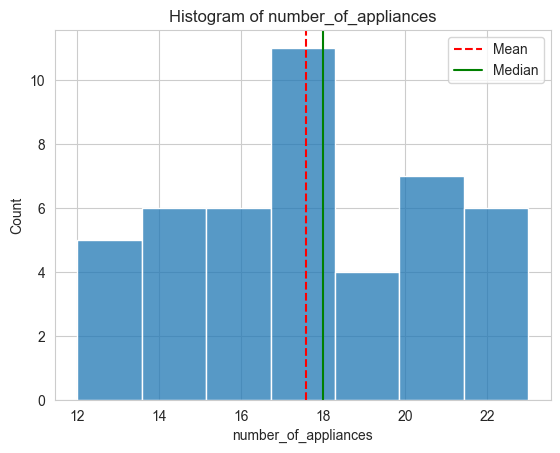

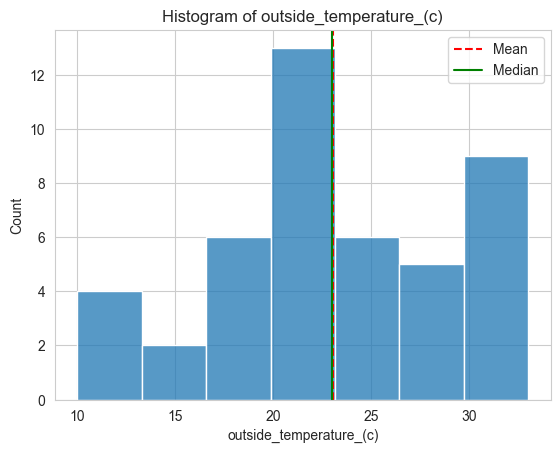

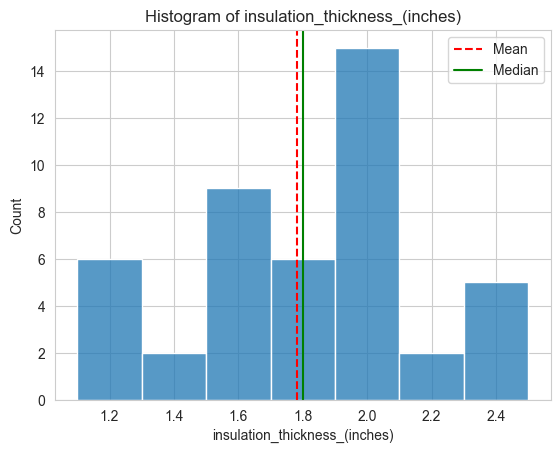

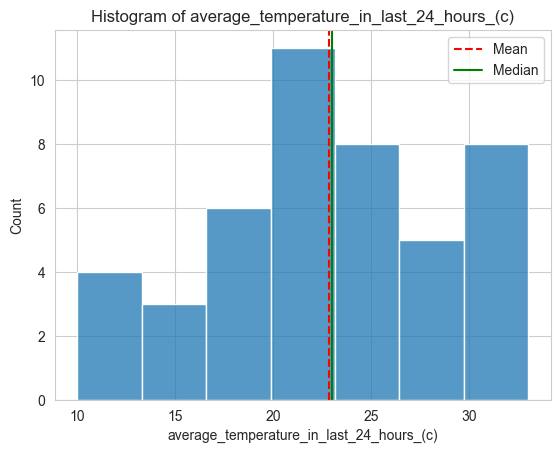

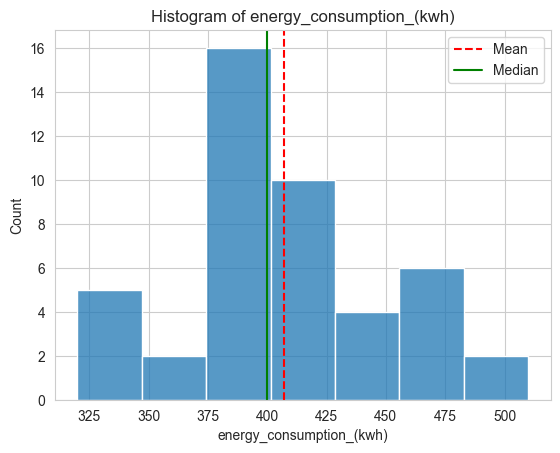

In [9]:
plot_histogram_with_stats(df)

In [6]:
detect_distribution(df=df)

{'room_area_(sq._ft.)': 'Left skewed',
 'number_of_appliances': 'Normally distributed',
 'outside_temperature_(c)': 'Normally distributed',
 'insulation_thickness_(inches)': 'Normally distributed',
 'average_temperature_in_last_24_hours_(c)': 'Normally distributed',
 'energy_consumption_(kwh)': 'Uniformly distributed'}